In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
print (X)
print (y)

n_samples, n_features = X.shape
print (X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [3]:
print (X_train, y_train)

[[1.288e+01 1.822e+01 8.445e+01 ... 1.096e-01 2.582e-01 8.893e-02]
 [1.113e+01 2.244e+01 7.149e+01 ... 6.413e-02 3.169e-01 8.032e-02]
 [1.263e+01 2.076e+01 8.215e+01 ... 1.105e-01 2.226e-01 8.486e-02]
 ...
 [1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.822e+01 1.870e+01 1.203e+02 ... 1.325e-01 3.021e-01 7.987e-02]
 [1.272e+01 1.378e+01 8.178e+01 ... 6.343e-02 2.369e-01 6.922e-02]] [1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 

In [4]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [5]:
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print (X_train)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


[[-0.36180827 -0.26521011 -0.31715702 ... -0.07967528 -0.52798733
   0.2506337 ]
 [-0.8632675   0.71560604 -0.85646012 ... -0.76980239  0.44312729
  -0.20987332]
 [-0.4334453   0.32513895 -0.41286667 ... -0.06601541 -1.1169427
   0.0329492 ]
 ...
 [-0.479293   -0.17689018 -0.45697634 ... -0.20261414  0.18670009
   0.17414996]
 [ 1.16835876 -0.15364809  1.17466524 ...  0.26789258  0.19828067
  -0.23394164]
 [-0.40765597 -1.29715887 -0.42826344 ... -0.78042674 -0.88036793
  -0.80355834]]


In [6]:
# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)


In [7]:
# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)



In [8]:
# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 0.4856
epoch: 20, loss = 0.4161
epoch: 30, loss = 0.3686
epoch: 40, loss = 0.3340
epoch: 50, loss = 0.3076
epoch: 60, loss = 0.2866
epoch: 70, loss = 0.2695
epoch: 80, loss = 0.2553
epoch: 90, loss = 0.2432
epoch: 100, loss = 0.2327


In [9]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.8860


# Another example :

In [14]:
import torch
import torch.nn as nn
import numpy as np

# Example data
x = np.array([0.5, -1.2, 0.3, 0.7], dtype=np.float32)
y = np.array([1], dtype=np.float32)  # True label

# Convert to PyTorch tensors
x_tensor = torch.tensor([x], dtype=torch.float32)
y_tensor = torch.tensor([y], dtype=torch.float32)  # Remove extra dimension

# Define the model
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Number of input features is 4 in this example
n_features = 4
model = Model(n_input_features=n_features)

# Initialize parameters manually for reproducibility
with torch.no_grad():
    model.linear.weight = nn.Parameter(torch.tensor([[0.1, -0.2, 0.3, 0.4]], dtype=torch.float32))
    model.linear.bias = nn.Parameter(torch.tensor([0.5], dtype=torch.float32))

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Forward pass
y_pred = model(x_tensor)

# Reshape y_tensor to match y_pred's shape
y_tensor = y_tensor.view_as(y_pred)  # Ensure y_tensor has the same shape as y_pred

print(f'y_pred shape: {y_pred.shape}')
print(f'y_tensor shape: {y_tensor.shape}')

# Calculate loss
loss = criterion(y_pred, y_tensor)
print(f'Loss: {loss.item()}')

# Backward pass and update
loss.backward()
optimizer.step()
optimizer.zero_grad()

# Output updated weights and bias
print('Updated weights:', model.linear.weight)
print('Updated bias:', model.linear.bias)


y_pred shape: torch.Size([1, 1])
y_tensor shape: torch.Size([1, 1])
Loss: 0.2726847529411316
Updated weights: Parameter containing:
tensor([[ 0.1012, -0.2029,  0.3007,  0.4017]], requires_grad=True)
Updated bias: Parameter containing:
tensor([0.5024], requires_grad=True)


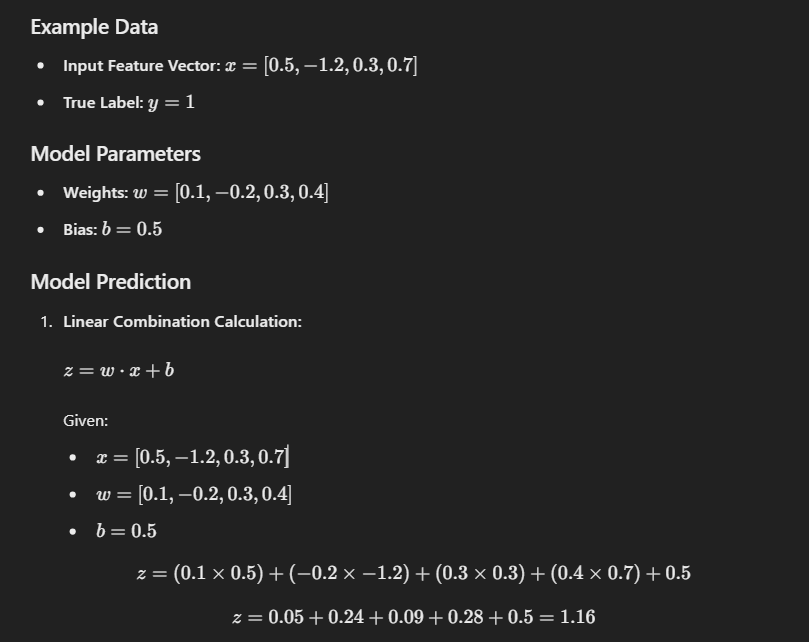

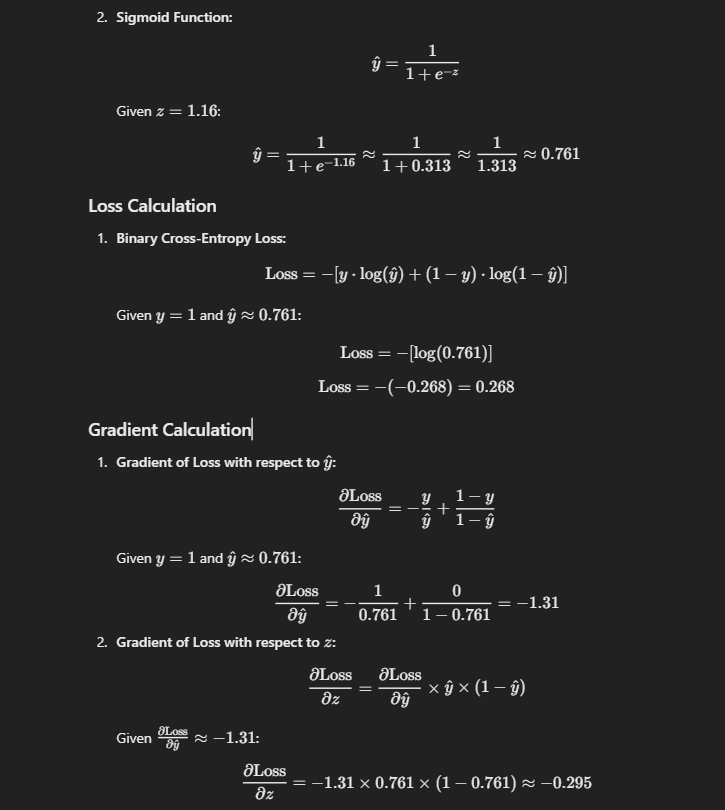

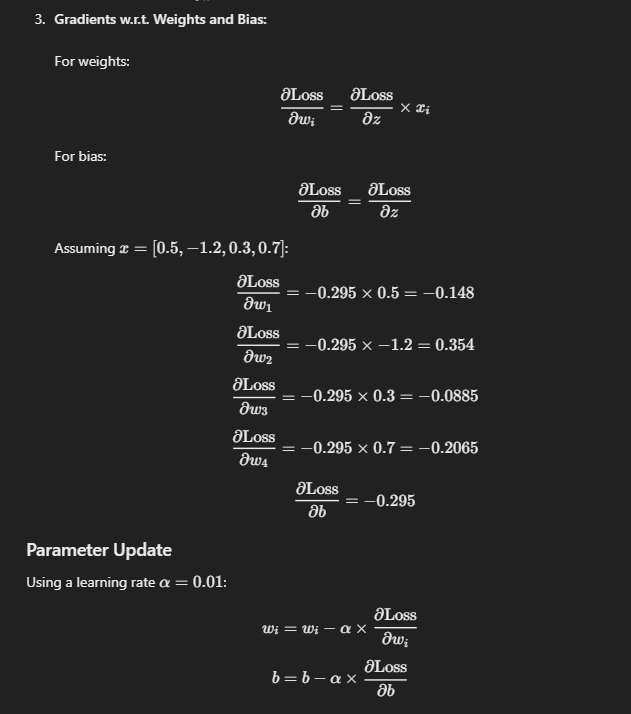

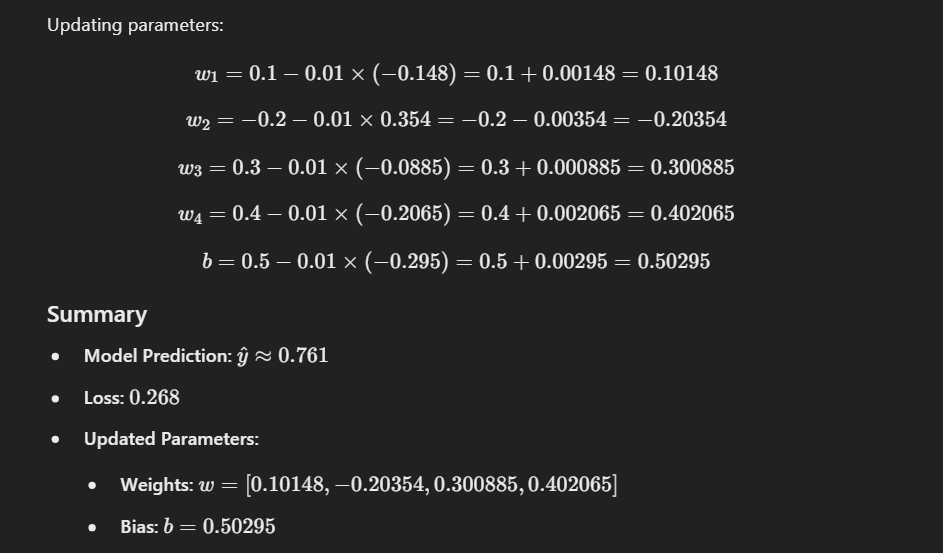